In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv("/content/1730285881-Airbnb_Open_Data.csv")
df.head()

/tmp/ipython-input-1836782488.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/1730285881-Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [35]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [36]:
df.drop_duplicates(inplace=True)
df.drop(["house_rules", "license"],axis=1,inplace=True)
df["price"]= df["price"].astype(str).str.replace("$","",regex=False).str.replace(",","",regex=False)
df["service fee"]= df["service fee"].astype(str).str.replace("$","",regex=False)
df["price"]= df["price"].astype(float)
df["service fee"]= df["service fee"].astype(float)
df["id"]= df["id"].astype(str)
df["host id"]= df["host id"].astype(str)
df["last review"]= pd.to_datetime(df["last review"])
df["Construction year"] = df["Construction year"].fillna(0).astype(int)
df.loc[df["neighbourhood group"] == "brookln", "neighbourhood group"] = "Brooklyn"
df.loc[df["neighbourhood group"] == "manhatan", "neighbourhood group"] = "Manhattan"
df.loc[df["neighbourhood group"] == "staten is", "neighbourhood group"] = "Staten Island"
df.dropna(inplace=True)


/tmp/ipython-input-3827289367.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["last review"]= pd.to_datetime(df["last review"])


In [37]:
df = df.drop(df[df["availability 365"]>500].index)
df.duplicated().value_counts()

,count
False,83546


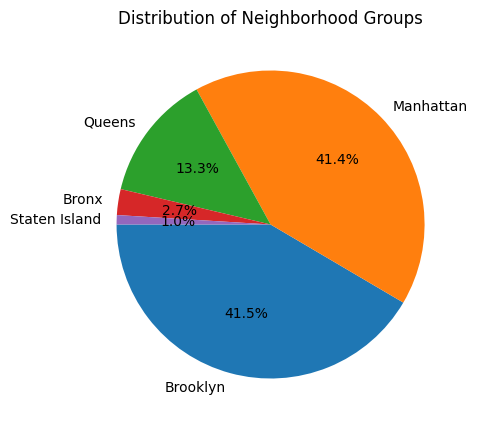

In [38]:
neighborhood_counts = df['neighbourhood group'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(neighborhood_counts, labels=neighborhood_counts.index, autopct='%1.1f%%', startangle=180)
plt.title('Distribution of Neighborhood Groups')
plt.show()

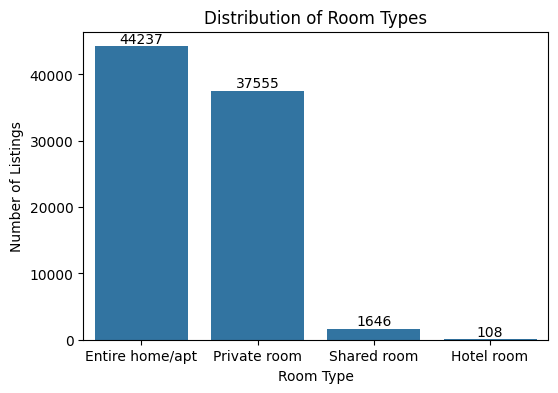

In [39]:
room_type_counts = df['room type'].value_counts()

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
for i, v in enumerate(room_type_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()

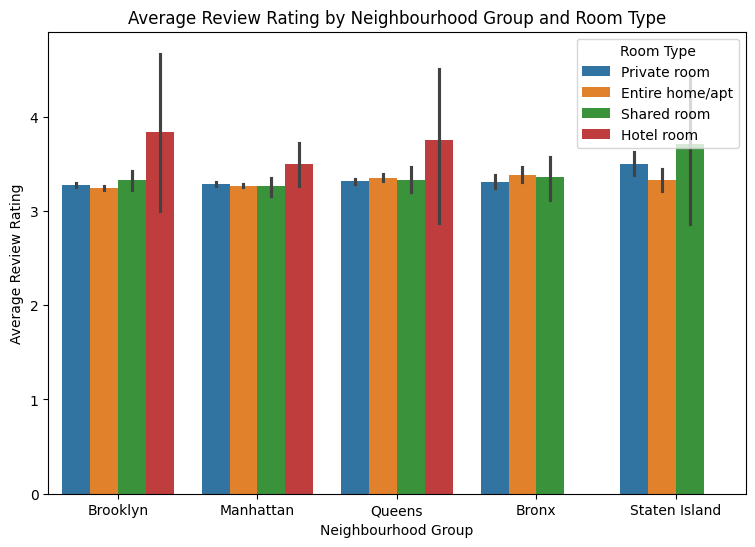

In [40]:
plt.figure(figsize=(9, 6))
sns.barplot(
    data=df,
    x="neighbourhood group",
    y="review rate number",
    hue="room type"
)

plt.title("Average Review Rating by Neighbourhood Group and Room Type")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Review Rating")
plt.legend(title="Room Type")
plt.show()